In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Empirical Distribution of a Statistic

* The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

* The empirical histogram of a large random sample is likely to resemble the histogram of the population.

* Given a large fish tank that contains 580 Mozambique tilapia fish
 * Suppose that we know, somehow, the weight of all the fishes in the tank
  * Population is the total of all fishes in the tank
  * Random variable $X \sim \mathcal{N}(630.26, 75.89)$.


In [1]:
weights = read.csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights)

,fish_index,data
,<int>,<dbl>
1,1,574.2974
2,2,728.5173
3,3,517.1673
4,4,561.2709
5,5,565.4517
6,6,696.6255


In [ ]:
dim(weights)

In [ ]:
weights_tbl = read_csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights_tbl)

In [ ]:
weights_tbl <- read_csv("data/tank_5_oreochromis_mossambicus.csv",
                      col_types = cols(
                        fish_index = col_integer(),
                        data = col_double()
                      ))
head(weights_tbl)

In [ ]:
names(weights_tbl) = c("index", "weights")
head(weights_tbl)

In [ ]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=weights), bins = 25, alpha=0.5, color="black", size=1)


### Working with Kernel Density Estimates


* Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable
  * A fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

* We much prefer to visualize data using KDEs instead of histograms for several reasons, which we will discuss later 
  * `geom_density` estiames the density using the KDE approach.
  * Param `bw` of `geom_density` is tricky to estimate, but for now, we will just use the value that provides the smoothest KDE with the lowest variance.


In [ ]:
ggplot(data=weights_tbl) + 
  geom_density(aes(x=weights), color="black", size=1, bw=30)



In [ ]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=weights, y=..density..), bins = 25, alpha=0.5, color="black", size=1) +
  geom_density(aes(x=weights), color="black", size=1, bw=25) +  
  scale_x_continuous(limits=c(300,1200), oob = scales::oob_keep)
  
# The oob = scales::oob_keep was added to fix an obscure warning
# the solution was proposed here
# https://github.com/tidyverse/ggplot2/issues/4083

### Parameters of a Distribution

* Recall that a distribution's parameters define what the distribution looks like
  * They are the numerical quantities that define a population

* Knowing the parameters can help:
  * Calculate the probability of certain events
  * Compute expectation
  * Understand the variance in the observations

* For the fish data, we can easily compute the population parameters.
 * We distinguish sample mean $\bar{X}$ from population mean $\mu$
   * We typically compute $\bar{X}$ based on a small sample of the data as a proxy for $\mu$
 * Here, we have access to the whole population, so we can calculate the population mean

In [ ]:
mean(weights_tbl$weights)
sd(weights_tbl$weights)

### Statistics 

- Statistics (field) deals to a large part with the estimation of unknown parameters. 

- A **statistic** (singular!) is any number computed using the data in a sample. 

* parameters estimated from subsets of the data are, therefore, statistics

  * Statistics are subject to sample bias.

* We know that for well behaved distributions samples are likely to resemble the populations they are drawn from
  * This is the whole promise in stats

* What would the sample mean look like if we randomly sampled from the population of all fish?


In [ ]:
set.seed(32) # Ask me what this means?
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

In [ ]:
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

### Statistics - Cont'd

* Each sample (50 fish) produces one observed value of the statistic. 
  * These values are "somewhat" similar to the real population mean (630.26)

* It is highly unlikely that different samples will yield the same statistic.
* Based on the selected samples, how does the statistic change? It is possible to answer this question by computing the statistic many times and noting the results
  * A histogram of those values will show us how the statistic is distributed.


In [ ]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50))

In [ ]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(1, mean)


In [ ]:
set.seed(42)
n = 1000

samples_means <- n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(  1, mean)

In [ ]:
samples_means

In [ ]:
ggplot() + 
  geom_histogram(aes(x=samples_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=samples_means), color="black", size=1, bw=3.5)


In [ ]:
mean(samples_means)

### Calculating Statistics

Example: 

* You use a DNA Methylation kit that is advertised to have a probability of success of 0.26 on invertebrates.

* You repeat the experiment 100 times (100 samples) and you only succeed 10 times (0.10)

* You argue with the vendor that the kit is faulty and needs to be replaced.


### A Model 

- A model stipulates that the probability of success is 0.26

- The manufacturer explain that they only provide probabilistic guarantees

   - I.e., if you were to repeat this a large number of times, you would arrive at the value 0.26
      - Repeat this process by trying 100 kits multiple times (say 500 times 100 kits)

- We are in a good position to assess this model

- What type of probability distribution is appropriate for this example?

  - Discrete or continuous?

- How can we simulate the experiment?
    
    - What are we trying to estimate? 

In [ ]:
x <- c(TRUE, TRUE, FALSE)
sum(x)

In [ ]:
rbinom(1, 100, 0.26)

In [ ]:
rbinom(1, 100, 0.26)

In [ ]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=successes, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=successes), color="black", size=1, bw=1.6)



### The Statistic

* The manufacturer says p=0.26 represents the population.

* A natural statistic, number of successes in our simulated sample of 100 tests.

  * Small value with favor alternative viewpoint.


* If the model were true, what is the distribution of success? 



In [ ]:
rbinom(10, 100, 0.26)

In [ ]:

n = 2

n %>%
  replicate(rbinom(10, 100, 0.26)) %>%
  t()


In [ ]:
# To get a sense of the variability, let's generate 10,000 simulated values of the count. 
nb_replicates = 10000
nb_kits = 100

nb_success = rbinom(nb_replicates, nb_kits, 0.26)

In [ ]:
head(nb_success)

In [ ]:
ggplot() + 
  geom_histogram(aes(x=nb_success, y=..density..), bins = 32, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=nb_success), color="black", size=1, bw=2) + 
  geom_vline(aes(xintercept=26))

In [ ]:
sum(nb_success <= 10)

### Comparing the Prediction and the Observed Data

- The value 10 is far out. 
  - No samples yield less 10 that 10 successes

- Assuming the claim is true, if we use the kit 100 times, the probability of observing 10 successes is ~0 

- This is evidence that the model (claim) is not consistent with the data we obtained

  - When the data and a model are inconsistent, the model is hard to justify. 

- While it is *possible* to have 10 successes, simulation shows that it's extremely unlikely. 
  * The empirical probability of such an event is actually null


### General Approach

* This method of assessing models is very general. 
1. We have a value we wish to compare to some distribution
2. We generate samples under the hypothesis we would like to test
  * This is called the null hypothesis

3. we reason about the observed data or statistic


* Here is an example in which we use it to assess a model in a completely different setting

### Mendel's Pea Flowers ###

* In a particular variety, each pea plant has either purple or white flowers.

* Plant colors are independent

* Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

* The null model: For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in the remaining plants.

* We sampled 100 flowers and 72 were actually purple

* Do our results agree with Mendel's model?


### Approach to Assessment

1. Assess the model by simulating plants under the assumptions of the model 

2. Compare the results to the data that Mendel recorded
    * If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. 
 
    * If the model is not good, the percent purple-flowering will be away from 75%. 

        * It may be higher, or lower; the direction doesn't matter.

3. The *distance* between 75% and the percent of purple-flowering plants in the sample is critical. 

 * Big distances are evidence that the model isn't good. Therefore, a good statistic is the distance between the sample percent and 75%

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$


### Predicting the Statistic Under the Model ###

* How big the distance would be if Mendel's model were true?

  * Use `sample_proportions` to simulate the distance under the assumptions of the model.

* Mendel had 929 plants of the variety corresponding to this model.

* One simulated value of the experiment would look like


In [ ]:
rbinom(1, 929, 0.75)/929

In [ ]:
rbinom(1, 929, 0.75)/929

### Predicting the Statistic Under the Model ###

* How big the distance would be if Mendel's model were true?

  * Use `sample_proportions` to simulate the distance under the assumptions of the model.

* Mendel had 929 plants of the variety corresponding to this model.

* One simulated value of the experiment would look like


In [245]:
rbinom(1, 929, 0.75)/929

[1] 0.7416577

In [26]:
rbinom(1, 929, 0.75)/929

[1] 0.7621098

In [27]:
rbinom(1, 929, 0.75)/929

[1] 0.7642626

In [31]:
# We could simulate from a batch of size 929, as Mendel did
abs((100 * rbinom(1,929, 0.75)/929) - 75)

[1] 2.44887

### Running the Simulation
* To get a sense of how variable the distance could be, we have to simulate it many more times.
  * We will generate 10,000 values of the distance.
* We will plot the histogram of the simulated values to see the distribution of the distance as predicted by the model.


In [258]:

(100 * rbinom(10, 929, 0.75)/929) - 75


[1] -0.6189451  0.4574812 -1.3724435  1.4262648 -1.3724435  0.7804090
 [7]  0.9956943  1.2109795  1.6415501  0.4574812

In [267]:
distances = abs((100 * rbinom(10000, 929, 0.75)/929) - 75)
distances[0:10]

[1] 1.26480086 0.61894510 2.01829925 0.40365985 1.21097955 0.18837460
 [7] 0.08073197 1.64155005 0.24219591 0.29601722

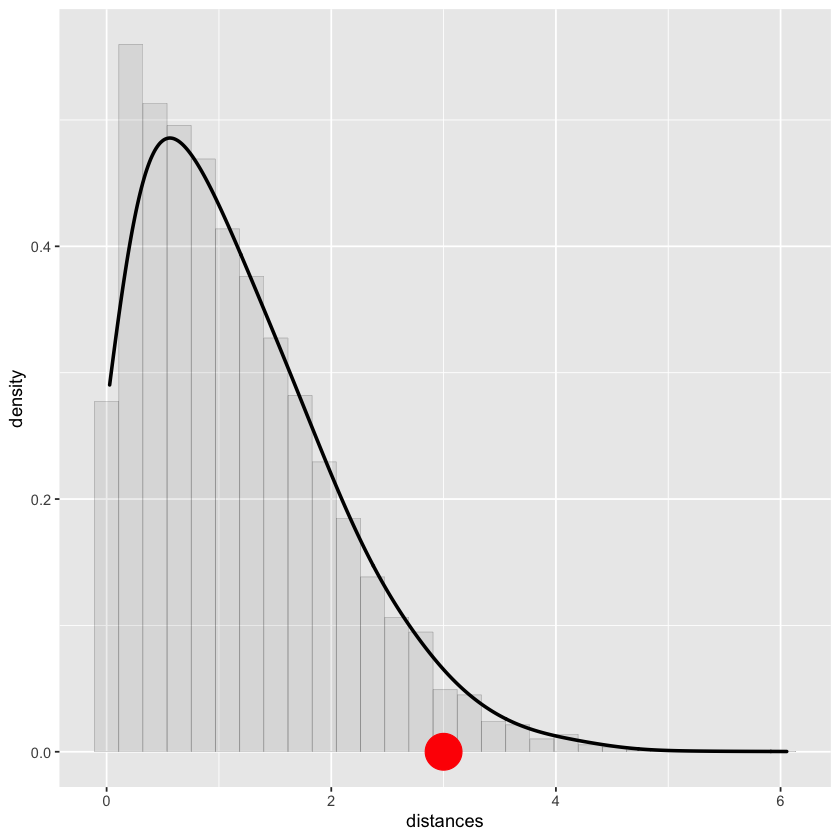

In [288]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=distances, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=distances), color="black", size=1, bw=0.3) + 
  geom_point(aes(x=3, y=0), size=10, color="red")


In [292]:
sum(distances >=3)/10000

[1] 0.0331